# Week 2: A Data Scientist's most fundamental tools

Today's exercises will be related to chapters 3, 4, 5 from DSFS. The point of these exercises is to refresh your memory on some mathematics and get you comfortable doing computations in code.

The exercises today cover:
* Basic visualization
* Linear algebra
* Statistics

**Advice**: Some of you may be new to solving problems using code. You may be wondering *what level of detail* I expect in your solutions, your code comments and explanations. **This is the guideline:** Solve the exercises in a manner that allows you to—later in life—use them as examples. This also means that you should add code comments when the code isn't self-explanatory or if you're afraid it won't make sense when you look at it with fresh eyes. You may also want to comment on your output in plain text to capture the conclusions you arrive at throughout your analysis. But express yourself succinctly. To quote (probably) Einstein: *"Make everything as simple as possible, but not simpler"*. Finally, when you optimize for your own future comprehension, other people will be able to understand what you did.

## Exercises

### Part 1: Visualization (DSFS Chapter 3)

Consult the [pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) tutorial as needed.

>**Ex. 2.1.1 SOLVED**: The figure below meets the minumum style requirements which I expect the figures you make in this class (and life in general) should also meet:
* Figure sizing. Try to make the aspect ratio close to 4:3.
* Axis labels. Note that you may want to alter the `fontsize` to make them look nice.
* Properly sized x and y tick labels.
* Title (optional: not always necessary, but oftens helps the reader)
* Legend (general rule: only use if you have multiple trends so reader can distinguish).
>
> Your task in this exercise is to plot 10 points that roughly fall on a sinusoid.
>
>*Hint: To get figures to display inside the notebook, use the Jupyter magic `%matplotlib inline`. For pointers on how to make plots like this in Python, check out the textbook or Google something like "scatter plot python" and see if you can find some examples of how other people do this.*

Make sure you understand the code!

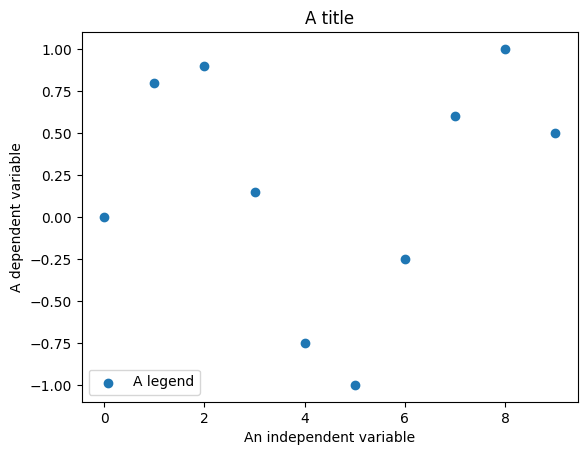

In [1]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
indep_var = range(10)
dep_var = [0, 0.8, 0.9, 0.15, -0.75, -1, -0.25, 0.6, 1, 0.5]

plt.scatter(indep_var, dep_var)
plt.title("A title")
plt.xlabel("An independent variable")
plt.ylabel("A dependent variable")
plt.legend (["A legend"], loc=3)
plt.show()

>**Ex. 2.1.2**: The `get_x_y` function below gives you the number of comments versus score for the latest `N` posts on a given `subreddit`. First, make sure you understand the code.  Then: 
1. Make a scatter plot of `x` vs. `y` for the "blackmirror" subreddit (**remember** what you learned in the previous exercise about **styling**). **Comment on what you see in the plot.**
2. Maybe you've noticed that it looks pretty bad right, in the sense that lots of points are close to each other while a few are far away from the rest? That's because the data does *not scale linearly*! This is a very common thing. To visualize it you should then try to *transform* it somehow. In this case, the data scales *exponentially* in both the x and y direction. Which transformation should we use to make it look linear?
3. In two separate figures, floating side by side, scatter plot (left) the set of x and y variables for "blackmirror" and (right) x and y for "news" (you can use [subplots](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html), for example, to plot two figures sideby side). Remember to transform the data. When I solved this exercise a while back, my figure looked like [this](https://canvas.disabroad.org/courses/7869/files/1211244?module_item_id=224615).
4. Interpret and comment on any differences you see between the two plots. Why might number of comments versus post upvotes look different for a TV-show than for world news?
>
>*Hint: By "transformation" in point 2 and 3 above, I mean that you map some function onto every value in a list of values. Example: I can apply a square root transformation like `x = [np.sqrt(v) for v in x]`. A faster way to do that, of course, would be just `x = np.sqrt(x)`.*

In [2]:
import requests as rq

def get_x_y(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = f"https://www.reddit.com/r/{subreddit}/.json?count={count}&after={after}"
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print(f"Retrieved {count} posts from page {after}")
        return data
    
    after = ""

    x, y = [], []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            x.append(d['data']['num_comments'])
            y.append(d['data']['score'])
        after = data['data']['after']

    return x, y
                          
x_blackmirror, y_blackmirror = get_x_y("blackmirror", 500, count=25)
x_news,y_news = get_x_y("news", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_10kdxyw
Retrieved 25 posts from page t3_10c8s14
Retrieved 25 posts from page t3_zzpoqs
Retrieved 25 posts from page t3_zuolid
Retrieved 25 posts from page t3_zq3du7
Retrieved 25 posts from page t3_zhrnr6
Retrieved 25 posts from page t3_zcy5zp
Retrieved 25 posts from page t3_z4ddal
Retrieved 25 posts from page t3_yz1fbz
Retrieved 25 posts from page t3_yoq4pd
Retrieved 25 posts from page t3_ygf5c1
Retrieved 25 posts from page t3_y98foi
Retrieved 25 posts from page t3_y4yck0
Retrieved 25 posts from page t3_xx6v1r
Retrieved 25 posts from page t3_xpz4b0
Retrieved 25 posts from page t3_xhukmn
Retrieved 25 posts from page t3_x7musy
Retrieved 25 posts from page t3_wymcgq
Retrieved 25 posts from page t3_wqwf2v
Retrieved 25 posts from page 
Retrieved 25 posts from page t3_10sglb8
Retrieved 25 posts from page t3_10reu4w
Retrieved 25 posts from page t3_10r153j
Retrieved 25 posts from page t3_10qglo0
Retrieved 25 posts from page t3_10qnm

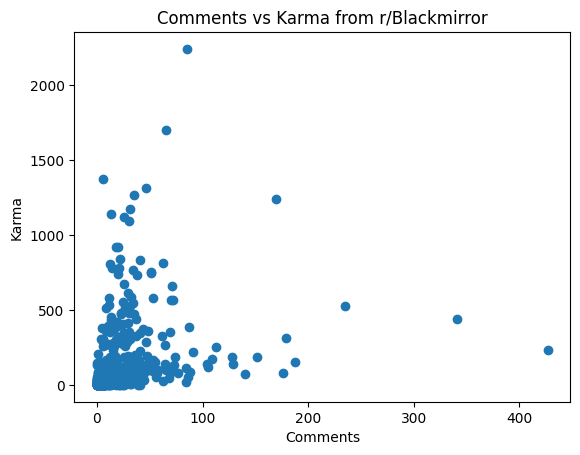

In [7]:
%matplotlib inline
plt.scatter(x_blackmirror, y_blackmirror)
plt.title("Comments vs Karma from r/Blackmirror")
plt.xlabel("Comments")
plt.ylabel("Karma")
plt.show()

C:\Users\elias\AppData\Local\Temp\ipykernel_39208\2198474020.py:1: RuntimeWarning: divide by zero encountered in log
  x_blackmirror_transformed = [np.log(p) for p in x_blackmirror]


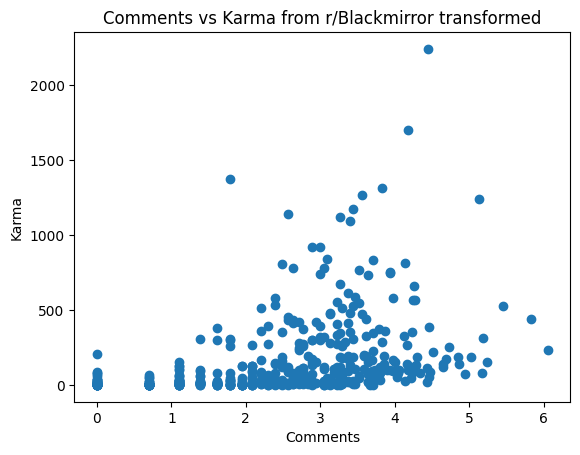

In [8]:
x_blackmirror_transformed = [np.log(p) for p in x_blackmirror]
y_blackmirror_transformed = [np.log]
plt.scatter(x_blackmirror_transformed, y_blackmirror)
plt.title("Comments vs Karma from r/Blackmirror transformed")
plt.xlabel("Comments")
plt.ylabel("Karma")
plt.show()

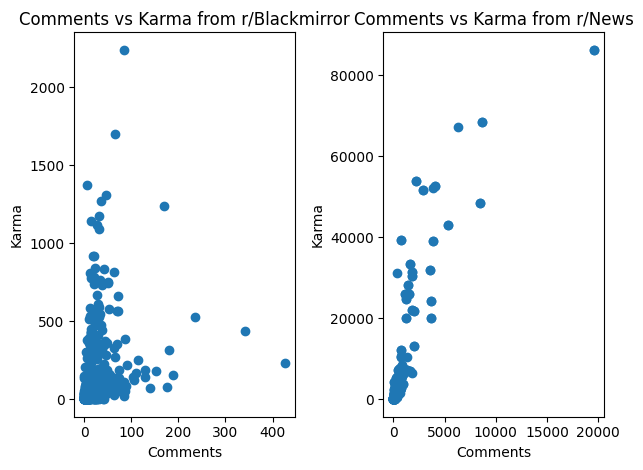

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2)
x_news_transformed = [np.sqrt(p) for p in x_news]
ax1.scatter(x_blackmirror, y_blackmirror)
ax1.set_title("Comments vs Karma from r/Blackmirror")
ax1.set_xlabel("Comments")
ax1.set_ylabel("Karma")
ax2.scatter(x_news, y_news)
ax2.set_title("Comments vs Karma from r/News")
ax2.set_xlabel("Comments")
ax2.set_ylabel("Karma")
plt.tight_layout(h_pad=50)
plt.show()

>**Ex. 2.1.3**: There is clearly a huge level unevenness in the distribution of likes and comments given to different posts. Let's visualize this using histograms!
1. Log transform `y` (e.g. create a new variable called `y_transformed`) and input it to `plt.hist`. Notice that if there are zeros in `y`, `np.log` will convert them to `-inf`, which `plt.hist` can't handle. You should therefore remove zeros before log transforming. When you have done this, execute `hist_output = plt.hist(y_transformed)`. This should produce a histogram. But what does the variable `hist_output` contain?  Check out [hist](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html).
2. OPTIONAL. Use the contents of `hist_output` to make a similar histogram with the `plt.bar` plotting function. I make you do this to force into your permanent memory what a histogram is: a bar chart showing counts within intervals/bins. (Many students get stuck on this question.  If you spend more than 5 minutes on this, leave it for now and return to it later.)
3. Plot the distributions of `y_transformed` for "blackmirror" and "news" as histograms, side by side (you can just use the regular `plt.hist` function here). My figure looked like [this](https://canvas.disabroad.org/courses/7869/files/1211243?module_item_id=224616). Interpret/comment on the result.

### Part 2: Linear algebra (DSFS Chapter 4)

>**Ex. 2.2.1**: What does Joel (book) mean when he uses the word *vector*? What are [Grant Sanderson](https://youtu.be/fNk_zzaMoSs)'s vector definitions from the perspectives of the Physicist, the Computer Scientist and the Mathematician, respectively?

>**Ex. 2.2.2**: Using `numpy`, compute:
1. `2 * [2, 3]`,
2. `[3, 8] + [6, 1]`,
3. `[3, 8] * [6, 1]` and
4. `[3, 8] · [6, 1]` (dot product)
5. `[3, 8, 0] x [6, 1, 0]` (cross product)

In [ ]:
print(2*np.array([2,3]))
print(np.array([3,8])+np.array([6,1]))
print(np.array([3,8])*np.array([6,1]))
print(np.dot(np.array([3,8]),np.array([6,1])))
print(np.cross(np.array([3,8,0]),np.array([6,1,0])))

>**Ex. 2.2.3**: Say you have two vectors. What does it mean that the dot product between them is zero or very close to zero? What if it's very large? Intuitively, what does the dot product then measure?

If the cross product is zero it means that the vectors are orthogonal. If the dot product is large it means that the magnitude of the two vectors are large, it is not necessarily possible to determine directional information about the vectors from a large magnitude.

>**Ex. 2.2.4**: In Data Science, we often think of matrices as (usually two-dimensional) containers for data. If we have $N$ data points each with $M$ features to them, we can represent this data using an $N \times M$ matrix, that is a matrix that has $N$ rows, one for each datapoint, and $M$ columns, one for each feature. Below I fetch a dataset of wines (rows) and their features (columns).

In [11]:
import pandas as pd

# Download dataset
X = pd.read_csv("https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv").drop('Wine', axis=1)

# Display dataset
X.head(10)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


>So this dataset has $N=178$ rows and $M=13$ columns. Let's start by finding the so-called *covariance matrix* of the features. It is a square, in this case, $13\times13$ matrix where every value $i,j$ represents the covariance between features $i$ and $j$. [Read more here](https://en.wikipedia.org/wiki/Covariance_matrix).
1. Use the `np.cov` method on this data to get the $13 \times 13$ covariance matrix.
2. Do you notice any characteristics of how values are organized in this matrix? Comment.
3. Plot the distribution of covariances, e.g. using a histogram.
4. Plot the distribution of correlations in the same way. Comment on the differences between these two plots. Is one easier to interpret than the other?
>
>*Hint for 1: `np.cov` expects that rows are features and columns are observations. That is the transpose of how `X` 
is represented now.*<br>
>*Hint for 3: DO NOT just do something like `plt.hist(my_cov_matrix)`, as this will result in something completely different than what we are after (and not particularly meaningful).  Instead, use the covariance matrix to create a vector in which you keep all the distinct covariances.* <br>
>*Hint for 4: The correlation matrix can be obtained with the `np.corrcoef` function.*

(array([ 1.,  1., 74.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-463.35534501, -240.10394052,  -16.85253602,  206.39886847,
         429.65027296,  652.90167746,  876.15308195, 1099.40448645,
        1322.65589094, 1545.90729544, 1769.15869993]),
 <BarContainer object of 10 artists>)

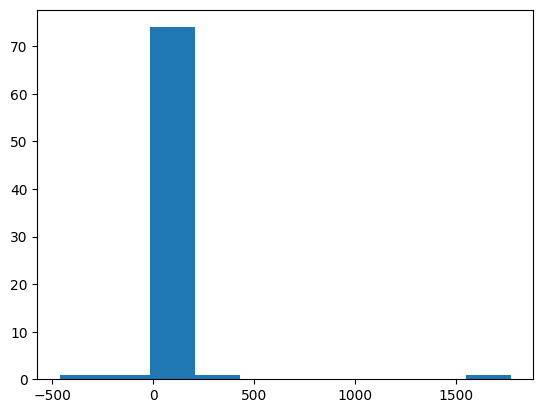

In [12]:
distinct_covariances = set()
covariances = np.cov(X.T)
for i in range(len(np.cov(X.T))):
    for j in range(i):
        if i == j :
            continue
        else:
            distinct_covariances.add(covariances[i][j])
plt.hist(distinct_covariances)

>**Ex. 2.2.5**: There's another use of the covariance matrix, other than just learning how features co-vary. In fact, it turns out that the *eigenvectors* of the covariance matrix are a set of mutually orthogonal vectors, that point in the directions of greatest variance in the data. The eigenvector with the greatest *eigenvalue* points along the direction of greatest variation, and so on. This is pretty neat, because if we know along which axes the data is most stretched, we can figure out how best to project it when visualizing it in 2D as a scatter plot! This whole procedure has a name: **Principal Component Analysis** (PCA) and it was invented by Karl Pearson in 1901. It belongs to a powerful class of linear algebra methods called **Matrix Factorization** methods. Ok, so rather than spending too much time on the math of PCA, let's just use the `sklearn` implementation and fit a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on `X`.

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)

NameError: name 'X' is not defined

>1. Explain what the matrix you get when you call `pca.components_` means.  Read about the `components_` attribute (run `?pca` in a code cell and then look under "Attributes").
2. Make a bar plot of `pca.explained_variance_ratio_` and explain what it means (you may want to log-scale the y-axis). What insights about our data can we extract from this?
3. Indeed, problem with the data AS-IS, is that the different features have very different variances (some are huge numbers others are small). The way to fix this is by doing something called "[zscoring](https://en.wikipedia.org/wiki/Standard_score)", whereby each feature is rescaled to have zero mean and unit standard deviation. In this way, all of the data ends up with comparable variance. Make a new array `X_z` that is the zscored `X`, using the `scipy.stats.zscore` function. Show that each column has zero mean and unit standard deviation.
4. Transform `X` using the PCA we fitted above to create a new array `X_pca`. Then fit a new PCA to `X_z` and transform it to create another new array `X_z_pca`. Finally, scatter plot against each other the first two components (i.e. fitst two columns in array) of `X_pca`. Do the same for `X_z_pc`. Comment on the difference.

>*Hint for 4: use `pca.transform` or `pca.fit_transform`. Understand the difference between the two.*

When pca.compoents_ is called it returns a matrix of size n_components by n_features where components represent principal axes in feature space which represent the direction of the maximal amount of variance and features are the different categories being evaluated. 

The *pca.components_* attribute stores the principal axes in feature space which represent the directions of maximum variance in the data. The shape of the *components_* is (n_components, n_features) where each row in *components_* corresponds to the principal component (eigenvector) and each column corresponds to a feature. The values in *components_* represent the weight of that feature in the principal component.

In [4]:
?pca

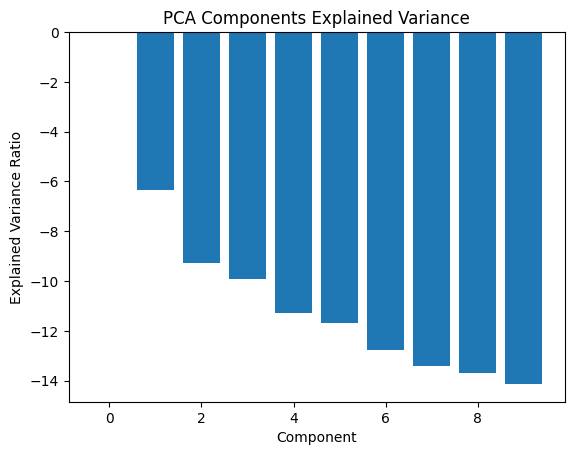

In [24]:
%matplotlib inline
plt.bar(range(len(pca.explained_variance_ratio_)), np.log(pca.explained_variance_ratio_))
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Components Explained Variance')
plt.show()

Given that the log of the 0th component is almost exactly zero that feature seems to explain most the data with the other features being extraneous.

In [27]:
import scipy
X_z = scipy.stats.zscore(X)
print("Mean of X_z:", np.mean(X_z))
print("Standard deviation of X_z:", np.std(X_z))

Mean of X_z: Alcohol                -8.619821e-16
Malic.acid             -8.357859e-17
Ash                    -8.657245e-16
Acl                    -1.160121e-16
Mg                     -1.995907e-17
Phenols                -2.972030e-16
Flavanoids             -4.016762e-16
Nonflavanoid.phenols    4.079134e-16
Proanth                -1.699639e-16
Color.int              -1.122697e-17
Hue                     3.717376e-16
OD                      2.919013e-16
Proline                -7.484650e-18
dtype: float64
Standard deviation of X_z: Alcohol                 1.0
Malic.acid              1.0
Ash                     1.0
Acl                     1.0
Mg                      1.0
Phenols                 1.0
Flavanoids              1.0
Nonflavanoid.phenols    1.0
Proanth                 1.0
Color.int               1.0
Hue                     1.0
OD                      1.0
Proline                 1.0
dtype: float64


C:\Users\elias\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


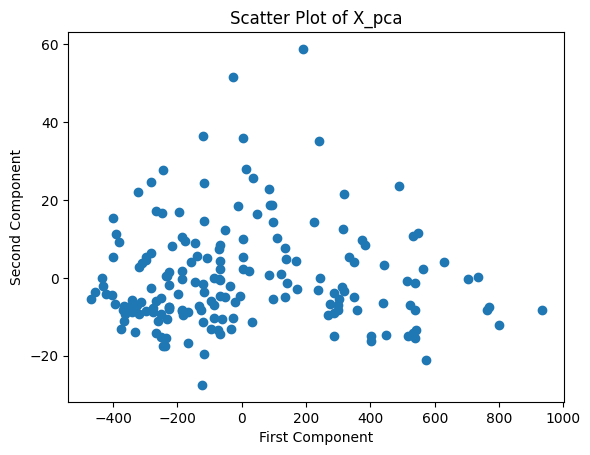

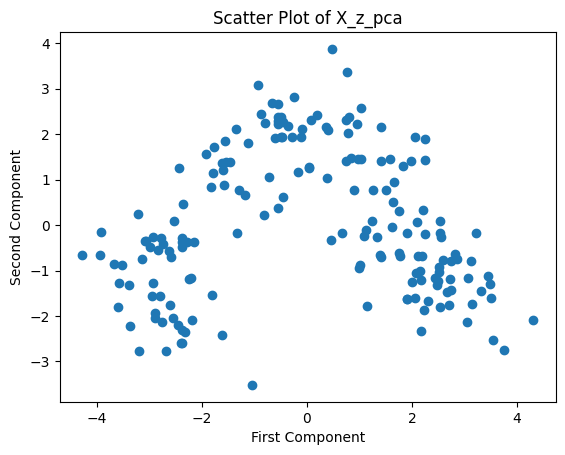

In [29]:
X_pca = pca.transform(X)

pca_z = PCA()
pca_z.fit(X_z)

X_z_pca = pca_z.transform(X_z)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("Scatter Plot of X_pca")
plt.show()

plt.scatter(X_z_pca[:,0], X_z_pca[:,1])
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("Scatter Plot of X_z_pca")
plt.show()

### Part 3: Statistics (DSFS Chapter 5)

>**Ex. 2.3.1**: Take a vector `a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]`:
1. Compute the mean of `a` using `numpy`.
2. How is median defined? Compute the median of `a` using `numpy`.
3. For `a`, why might it make sense to take the median more seriously than the mean?

In [41]:
a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]
print(np.mean(a))
print(np.median(a))
#Because there is a huge outlier of 9000

1002.3333333333334
3.0


>**Ex. 2.3.2**: Using the same vector `a`:
1. How is *range* defined? Compute it.
2. How is *variance* defined? How do variance and standard deviation relate? Compute them both. Which value is greater?
3. What is the interquartile range? Compute it, and explain why it might be useful.

In [35]:
#Range is the difference between the maximum and minimum values
print(np.max(a)-np.min(a))
#Variance is the measure of the spread of a set of data. It represents the average squared deviation of the data from the mean
#standard deviation is the square root of the variance therefore variance will be greater
print(np.var(a))
print(np.std(a))

#interquartile range is a measure of the spread of data between the first 25th percentile and the third 75th percentile
#It is useful because it is less prone to being affected by outlier
print(np.percentile(a,75)-np.percentile(a,25))

8999
7995336.222222224
2827.6025573305424
4.0


>**Ex. 2.3.3**: Covariance and correlation are both measures of trend similarity.
1. How do they relate?
2. Compute the correlation between `a` and `b = [0, 4, 1, 6, 2, 0, 6, 0, 2]`.
3. How does that result change if you remove the last data-point from each list? Why? What *term* do we use for that last value for both `a` and `b`?

Covariance and correlation are related measures of the relationship between two variables. Covariance measures the degree to which two variables change together while correlation measures the strength of the linear relationship between two variables. Correlation is therefore a normalized measure of covariance that is scaled to fall between -1 and 1 where -1 indicates a strong negative relationship, 1 indicates a strong positive relationship and 0 indicates no linear relationship.

In [44]:
b = [0, 4, 1, 6, 2, 0, 6, 0, 2]
print(np.corrcoef(a,b)[0,1])
a_prime = a[:-1]
b_prime = b[:-1]
print(np.corrcoef(a_prime,b_prime)[0,1])

-0.05051844317076045
0.9766053372749897


>**Ex. 2.3.4.EXTRA**: People often use the p-value to gauge the *significance* of a given result. If the p-value of a result is low, the result is significant (which is good) and vice versa. Intuitively, the p-value measures the probabilty that a result *could have been obtained at random*, so you can imagine that if you find that the p-value for some result is HIGH (close to one), regardless of how cool it is, people will not care because, well, you just got lucky with that measurement. I created two lists for you below; you are going to find out if they are *significantly* correlated. You will be using the significance threshold 0.05 (which is arbitrary, disputed, yet very standard in the literature).
>
>***This exercise is not be included in the assignment. However, you can earn up to 10 extra credit points if you solve it and submit it to the teacher. Your solution must reflect that you have understood the idea of numerical hypothesis testing.  This is individual, not group work -- so send me an email with your solution, do not submit it in the group submission.***

In [ ]:
# You can incresae this to make the data more noisy (but let it be 4 for now)
noise_level = 4

# I'm just seeding the random number generator here, so we can compare results
np.random.seed(0)

# This is your data
x = np.arange(0, 20) + np.random.normal(size=20) * noise_level
y = np.arange(0, 20) + np.random.normal(size=20) * noise_level

In [ ]:
# Why not make a scatter plot here, to see what you're working with?
plt.figure(figsize=(4, 3))
plt.scatter(x, y)
plt.show()

>1. If you plotted `x` and `y` against each other, you probably noted that it looks like they correlate. Use the method `pearsonr` from `scipy.stats` to **compute the correlation coefficient**. Notice that the method also gives you the p-value of the correlation. For now, we ignore this.
>2. So how do we figure out if this correlation strength is significant? 
The devil's advocate would surely argue, that you could obtain a similar *or stronger* correlation between completely random data.
Well, screw you advocate, because we can SHOW that if you randomize THIS data, the correlation strength is almost always lower!
To put this in stat-lingo, the devil's advocate believes in the so-called *Null Hypothesis*–that your result is no different from random–and the way we REJECT this acvocate's pessimistic hypothesis, is simply by comparing OUR obtained correlation strength to one obtained from data we know is random, namely the *Null model*.
The Null model, in this case just a randomized version of our existing data. 
Your job, now, is to take `x` and `y`, randomize them (each independently) and compute the correlation coefficient.
>3. In 2. you probably found that the correlation coefficient of the Null model was lower than that of your real data.
But that was just one example of the Null hypothesis being wrong.
The devil's advocate is not convinced and wants more evidence.
Compute again the correlation coefficient of the Null model, but do it in a `for` loop 10000 times, and report the fraction of times that this correlation coefficient is greater or equal to the correlation coefficient of your real data.
Maybe it will happen in 0% of randomizaion trials, maybe 2%, but hopefully not more than 5%.
Yes, you guessed, it, this fraction is indeed the p-value.
So is it really significant?
>4. Complete the function below that takes as input `noise_level` and computes a p-value. Let `noise_level` vary between 1 and 50 and plot the p-value as a function of `noise_level` so we can see how our result becomes less and less significant as we increase the noise. Two questions: (1) around which value of `noise_level` does the correlation become insignificant, and (2) which p-value does the curve saturate at for large `noise_level`?

In [ ]:
def compute_pval(noise_level, n=10000):

    # Seed random number generator
    np.random.seed(0)
    
    # Generate data
    x = np.arange(0, 20) + np.random.normal(size=20) * noise_level
    y = np.arange(0, 20) + np.random.normal(size=20) * noise_level
    
    # Unseed the random number generator
    np.random.seed(None)
    
    # Compute the baseline correlation coefficient
    r_baseline = pearsonr(x, y)[0]
    
    # Code with for loop that computes the p-value by randomizing data and
    # comparing Pearson correlation to baseline. Should correspond to your
    # code from 2.3.4.3.